In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.ticker as mticker

In [2]:
df = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data/U_mut_df_filtred_split.csv', index_col = 0)

c:\users\asus\appdata\local\programs\python\python39\lib\site-packages\IPython\core\interactiveshell.py:3169: DtypeWarning: Columns (16,17) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [3]:
df['RefAa'].unique()

array([nan, 'Lys', 'Glu', 'Gly', 'Ala', 'Asp', 'Ser_AG', 'Cys', 'Asn',
       'Thr', 'Leu_CU', 'Phe', 'Val', 'Ile', 'Pro', 'Ser_UC', 'Leu_UU',
       'Arg_AG', 'His', 'Gln', 'Arg_CG', 'Trp', 'Met', 'Tyr', '*_UG',
       '*_UA'], dtype=object)

In [4]:
df['AltAa'].unique()

array([nan, 'Glu', 'Lys', 'Gly', 'Ala', 'Asp', 'Ser_AG', 'Cys', 'Thr',
       'Asn', 'Phe', 'Leu_CU', 'Ile', 'Val', 'Ser_UC', 'Pro', 'Leu_UU',
       'Arg_AG', 'His', 'Gln', 'Arg_CG', 'Trp', 'Met', 'Tyr', '*_UG',
       '*_UA'], dtype=object)

In [5]:
#df = df[df['GenName'] != 'ORF1ab']
df = df[df['AaSub'] == 'NS']

In [6]:
df['Aa_Mut'] = df['RefAa'] + '>' + df['AltAa']
df['Mut'] = df['RefNuc'] + '>' + df['AltNuc']
mut_with_aa = df[['Aa_Mut', 'Mut']]

In [24]:
df[df['RefAa'] == 'Pro']['Aa_Mut'].value_counts()

Pro>Ser_UC    7183
Pro>Leu_CU    6252
Pro>His        603
Pro>Thr        419
Pro>Arg_CG     287
Pro>Gln        267
Pro>Ala         80
Name: Aa_Mut, dtype: int64

In [25]:
df[df['AltAa'] == 'Pro']['Aa_Mut'].value_counts()

Ser_UC>Pro    7106
Leu_CU>Pro    6132
His>Pro        612
Thr>Pro        450
Gln>Pro        270
Arg_CG>Pro     256
Ala>Pro         50
Name: Aa_Mut, dtype: int64

In [7]:
mut_with_aa = mut_with_aa.drop_duplicates()

In [8]:
df

,Pos,RefNuc,AltNuc,parent_nucl_context,child_nucl_context,parent_node,child_node,topology_dist,date,month,...,GenType,CodonNumber,NucInCodon,RefCodon,AltCodon,RefAa,AltAa,AaSub,Aa_Mut,Mut
6901,269,A,G,tgAag,tgGag,#33496#,hCoV-19/Russia/BEL-RII-MH17575S/2021,51,2021-04-22,2021-04,...,translated,2,1,AAG,GAG,Lys,Glu,NS,Lys>Glu,A>G
6902,269,A,G,tgAag,tgGag,#42474#,hCoV-19/Belgium/AZDelta-16070-2117R/2021,57,2021-05-02,2021-05,...,translated,2,1,AAG,GAG,Lys,Glu,NS,Lys>Glu,A>G
6903,269,G,A,tgGag,tgAag,#134#,hCoV-19/Sweden/20341914/2021,63,2021-05-28,2021-05,...,translated,2,1,GAG,AAG,Glu,Lys,NS,Glu>Lys,G>A
6904,269,G,A,tgGag,tgAag,#1113#,hCoV-19/Germany/un-RKI-I-132120/2021,66,2021-04-20,2021-04,...,translated,2,1,GAG,AAG,Glu,Lys,NS,Glu>Lys,G>A
6905,269,G,A,tgGag,tgAag,#134#,hCoV-19/Canada/AB-ABPHL-24651/2021,63,2021-07-08,2021-07,...,translated,2,1,GAG,AAG,Glu,Lys,NS,Glu>Lys,G>A
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
531872,29674,U,G,taTca,taGca,#49571#,hCoV-19/USA/CA-CDPH-2000025568/2021,40,2021-01-13,2021-01,...,translated,9756,3,UAU,UAG,Tyr,*_UA,NS,Tyr>*_UA,U>G
531874,29674,G,U,taGca,taTca,#5509#,hCoV-19/Curacao/CW-RIVM-56682/2021,93,2021-08-24,2021-08,...,translated,9756,3,UAG,UAU,*_UA,Tyr,NS,*_UA>Tyr,G>U
531875,29674,U,G,taTca,taGca,#24031#,hCoV-19/USA/LA-EVTL6249/2021,95,2021-08-12,2021-08,...,translated,9756,3,UAU,UAG,Tyr,*_UA,NS,Tyr>*_UA,U>G
531877,29674,G,U,taGca,taTca,#23233#,hCoV-19/Norway/OUS-02837/2021,47,2021-02-28,2021-02,...,translated,9756,3,UAG,UAU,*_UA,Tyr,NS,*_UA>Tyr,G>U


In [9]:
GainersGegen = ['UUC','UUU','UUG','UUA','AUC','AUU','AUA','UAC','UAU','UAG','UAA']
LoosersGegen = ['CCC','CCA','CCU','CCG','GCC','GCA','GCU','GCG','CGC','CGA','CGU','CGG','GGC','GGA','GGG','GGU','ACC','ACG','ACA','ACU','AGC','AGA','AGU','AGG','CAC','CAU','CAA','CAG','GAC','GAA','GAG','GAU']

Inter_U = ['CUU', 'CUC', 'CUA', 'CUG', 'UCU', 'UCC', 'UCA', 'UCG', 'GUU', 'GUC', 'GUA', 'GUG', 'UGU', 'UGC', 'UGA', 'UGG'] 

In [10]:
print('C>U')
print('throw mutspec', df[((df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(Inter_U)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(GainersGegen)) |
                        (df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(GainersGegen))) &
                        (df['Mut'].isin(['C>U']))].shape[0])
print('versus mutspec', df[((df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(Inter_U))) &
                        (df['Mut'].isin(['U>C']))].shape[0])

C>U
throw mutspec 73614
versus mutspec 72062


In [11]:
print('G>U')
print('throw mutspec', df[((df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(Inter_U)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(GainersGegen)) |
                        (df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(GainersGegen))) &
                        (df['Mut'].isin(['G>U']))].shape[0])
print('versus mutspec', df[((df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(Inter_U))) &
                        (df['Mut'].isin(['U>G']))].shape[0])

G>U
throw mutspec 26075
versus mutspec 21351


In [32]:
mut_throw_mut_spec = df[((df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(Inter_U)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(GainersGegen)) |
                        (df['RefCodon'].isin(LoosersGegen) & df['AltCodon'].isin(GainersGegen))) &
                        (df['Mut'].isin(['C>U', 'G>U']))]['Aa_Mut'].unique()

anti_mut_spec = df[((df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(Inter_U) & df['AltCodon'].isin(LoosersGegen)) |
                        (df['RefCodon'].isin(GainersGegen) & df['AltCodon'].isin(Inter_U))) &
                        (df['Mut'].isin(['U>C', 'U>G']))]['Aa_Mut'].unique()

In [35]:
print(len(mut_throw_mut_spec))
print(len(anti_mut_spec))

27
27


In [16]:
#anti_mut_spec = []
#for i in mut_throw_mut_spec:
#    second = i.split('>')[1]
#    first = i.split('>')[0]
#    anti_mut_spec.append(second+'>'+first)

In [36]:
df_aa_mut = df.pivot_table(index='Aa_Mut',values='Pos', aggfunc='count').reset_index()

In [37]:
df_aa_mut['Mut_Sub'] = ''

In [38]:
df_aa_mut.loc[df_aa_mut['Aa_Mut'].isin(mut_throw_mut_spec), 'Mut_Sub'] = 1

In [39]:
aa_mut_mut_spec = df_aa_mut[df_aa_mut['Mut_Sub']==1]

In [40]:
aa_mut_mut_spec['Anti_Aa_Mut'] = ''
aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
for index, row in aa_mut_mut_spec.iterrows():
    second = aa_mut_mut_spec['Aa_Mut'][index].split('>')[1]
    first = aa_mut_mut_spec['Aa_Mut'][index].split('>')[0]
    aa_mut_mut_spec['Anti_Aa_Mut'][index] = second+'>'+first
    try:
        aa_mut_mut_spec['Anti_Aa_Mut_count'][index] = df_aa_mut[df_aa_mut['Aa_Mut'] == aa_mut_mut_spec['Anti_Aa_Mut'][index]]['Pos']
    except:
        print('Нет таких мутаций', second+'>'+first)

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14408/1275787214.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut'] = ''
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14408/1275787214.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['Anti_Aa_Mut_count'] = 0
C:\Users\ASUS\AppData\Local\Temp/ipykernel_14408/1275787214.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.

In [41]:
aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['Pos'] / aa_mut_mut_spec['Anti_Aa_Mut_count']

C:\Users\ASUS\AppData\Local\Temp/ipykernel_14408/1925963218.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aa_mut_mut_spec['direct_vs_reverse'] = aa_mut_mut_spec['Pos'] / aa_mut_mut_spec['Anti_Aa_Mut_count']


In [42]:
aa_mut_mut_spec #= aa_mut_mut_spec.drop(59, axis=0)

,Aa_Mut,Pos,Mut_Sub,Anti_Aa_Mut,Anti_Aa_Mut_count,direct_vs_reverse
12,*_UG>Leu_UU,2,1,Leu_UU>*_UG,1,2.000000
19,Ala>Ser_UC,6001,1,Ser_UC>Ala,5029,1.193279
21,Ala>Val,12003,1,Val>Ala,11710,1.025021
25,Arg_AG>Ile,813,1,Ile>Arg_AG,705,1.153191
32,Arg_CG>Cys,1851,1,Cys>Arg_CG,1812,1.021523
36,Arg_CG>Leu_CU,698,1,Leu_CU>Arg_CG,599,1.165275
39,Arg_CG>Trp,90,1,Trp>Arg_CG,119,0.756303
52,Asp>Tyr,3602,1,Tyr>Asp,2888,1.247230
57,Cys>Phe,955,1,Phe>Cys,768,1.243490
62,Gln>*_UA,563,1,*_UA>Gln,551,1.021779


In [43]:
aa_mut_mut_spec.to_csv('aa_mut_with_versus_all.csv')

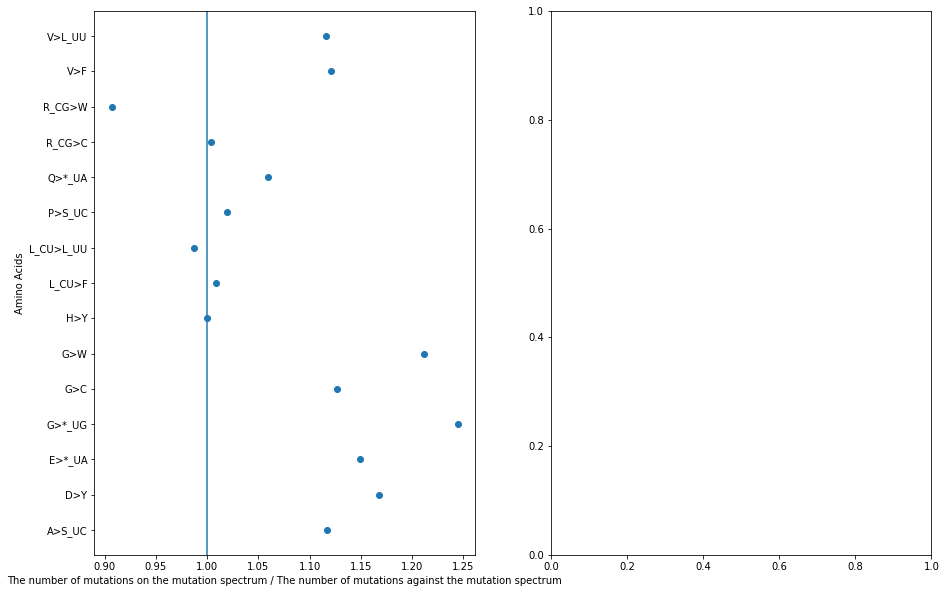

In [19]:
fig, ax = plt.subplots(1,2,figsize=(15,10))
er = ax[0].errorbar(aa_mut_mut_spec['direct_vs_reverse'], aa_mut_mut_spec['Aa_Mut'], marker="o", linestyle="none")
ax[0].set_xlabel('The number of mutations on the mutation spectrum / The number of mutations against the mutation spectrum')
ax[0].set_ylabel('Amino Acids')
#ax.text(5.5,26, 'Odds_ratio with CI 95%')
#ax.text(7,26, 'p_value')
#ax.text(8,26, 'Aa status')


ax[0].axvline(x=1)

plt.show()
fig.savefig('simply_th.png', dpi=300)

In [12]:
df_all = pd.read_csv('D:/Sars_Cov_2_MutSpec-main/Sars_Cov_2_MutSpec-main/Sars_Cov_2/new_data/data_obtained/aa_mut_binom_test_all.csv', index_col=0)

In [13]:
df_all

,Aa_Mut,Pos,Mut_Sub,Anti_Aa_Mut,Anti_Aa_Mut_count,direct_vs_reverse,p_value,CI_left,CI_right,prob_success,aster,first_aa,sec_aa,grantham
1,*_UG>Leu_UU,2,1,Leu_UU>*_UG,1,2.000000,1.000000e+00,0.094299,0.991596,0.666667,NaN,*,Leu,NaN
2,Ala>Ser_UC,6001,1,Ser_UC>Ala,5029,1.193279,2.214876e-20,0.534711,0.553389,0.544062,***,Ala,Ser,99.0
3,Ala>Val,12003,1,Val>Ala,11710,1.025021,5.792817e-02,0.499793,0.512561,0.506178,NaN,Ala,Val,64.0
4,Arg_AG>Ile,813,1,Ile>Arg_AG,705,1.153191,6.009044e-03,0.510107,0.560902,0.535573,**,Arg,Ile,97.0
5,Arg_CG>Cys,1851,1,Cys>Arg_CG,1812,1.021523,5.300991e-01,0.488997,0.521641,0.505324,NaN,Arg,Cys,180.0
6,Arg_CG>Leu_CU,698,1,Leu_CU>Arg_CG,599,1.165275,6.483032e-03,0.510587,0.565570,0.538165,**,Arg,Leu,102.0
7,Arg_CG>Trp,90,1,Trp>Arg_CG,119,0.756303,5.250922e-02,0.362513,0.500728,0.430622,NaN,Arg,Trp,101.0
8,Asp>Tyr,3602,1,Tyr>Asp,2888,1.247230,8.050848e-19,0.542818,0.567148,0.555008,***,Asp,Tyr,160.0
9,Cys>Phe,955,1,Phe>Cys,768,1.243490,7.287821e-06,0.530430,0.577916,0.554266,***,Cys,Phe,205.0
10,Gln>*_UA,563,1,*_UA>Gln,551,1.021779,7.417401e-01,0.475596,0.535147,0.505386,NaN,Gln,*,NaN


In [14]:
print(df_all['Pos'].sum())
print(df_all['Anti_Aa_Mut_count'].sum())

99689
93413


In [15]:
df_all = df_all.sort_values(by='grantham', ascending=False).reset_index(drop=True)
df_all['grantham'] = df_all['grantham'].astype('category')

In [16]:
df_all = df_all.rename(columns={"Pos": "Aa_Mut_count"})

In [17]:
df_all = df_all.merge(mut_with_aa, how='left', on='Aa_Mut')

In [18]:
df_all = df_all.drop(23, axis=0)

In [19]:
df_all = df_all.reset_index(drop=True)

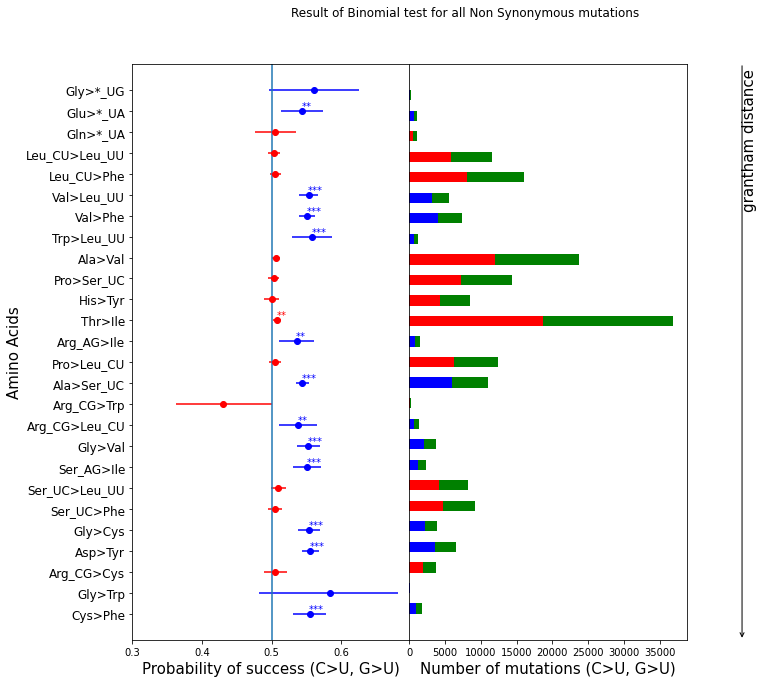

In [23]:
fig, ax = plt.subplots(1,2,figsize=(11,10))
min_error = list(df_all['prob_success'] - df_all['CI_left'])
max_error = list(df_all['CI_right'] - df_all['prob_success'])
error = []
for i in range(len(min_error)):
    error.append([min_error[i], max_error[i]])
error = np.array(error)
df_all['color'] = ''
df_all.loc[df_all['Mut']=='C>U', 'color'] = 'red'
df_all.loc[df_all['Mut']=='G>U', 'color'] = 'blue'

for i in range(len(df_all['color'])):
    er = ax[0].errorbar(df_all['prob_success'][i], i, xerr=error[i].reshape(2, -1), marker="o", linestyle="none", color=df_all['color'][i])

ax[0].set_yticks(np.arange(len(df_all['Aa_Mut'])))
ax[0].set_yticklabels(df_all['Aa_Mut'], fontsize=12)

ax[0].set_xlabel('Probability of success (C>U, G>U)', size=15)
ax[0].set_ylabel('Amino Acids', size=15)
# ax.text(5.5,26, 'Odds_ratio with CI 95%')
# ax.text(7,26, 'p_value')
# ax.text(8,26, 'Aa status')

i=0
df_all.loc[df_all['aster'].isna(),'aster'] = ''
for index, row in df_all.iterrows():
    if df_all['Mut'][index] == 'C>U':
        ax[0].text(df_all['prob_success'][index]-0.001, i+0.1, df_all['aster'][index], color='red')
    elif df_all['Mut'][index] == 'G>U':
        ax[0].text(df_all['prob_success'][index]-0.001, i+0.1, df_all['aster'][index], color='blue')
    i+=1
#     if aa_statistics_fisher['p_value'][index] < 0.05:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index], color='red')
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4), color='red')
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index], color='red')
#     else:
#         ax.text(5.5,i, aa_statistics_fisher['odds_ratio_with_CI'][index])
#         ax.text(7,i, round(aa_statistics_fisher['p_value'][index],4))
#         ax.text(8,i, aa_statistics_fisher['aa_status'][index])
#     i = i+1
#  besides ORF1ab or in ORF1ab
ax[0].axvline(x=0.5)
ax[0].get_xaxis().set_ticks([0.30, 0.40, 0.50, 0.60])

ax[1].barh(y=df_all['Aa_Mut'], width=df_all['Aa_Mut_count'], height = 0.5, color=df_all['color'])
ax[1].barh(y=df_all['Aa_Mut'], width=df_all['Anti_Aa_Mut_count'], left = df_all['Aa_Mut_count'], height = 0.5, color='green')
ax[1].get_yaxis().set_ticks([])
ax[1].set_xlabel('Number of mutations (C>U, G>U)', size=15)
plt.subplots_adjust(left=0.3,
                    bottom=0.1, 
                    right=1.0, 
                    top=0.9, 
                    wspace=0, 
                    hspace=0.4)
fig.suptitle('Result of Binomial test for all Non Synonymous mutations', horizontalalignment='left')
ax[1].annotate('', xy=(1.2, 1), xycoords='axes fraction', xytext=(1.2, 0), 
            arrowprops=dict(arrowstyle="<-", color='black'))
plt.text(1.07, 0.7, 'grantham distance', fontsize=15, rotation=90, transform=plt.gcf().transFigure)
plt.show()
fig.savefig('binom_test_all.pdf', dpi=300, bbox_inches = 'tight')
